# **Understanding the Arts Classification Scheme in Singapore**




# **Import Libraries**'

#### To get started, we will first need to get import some libraries

In [1]:
import requests # HTTP requests (GET / POST)
import datetime
import pandas as pd
from IPython.display import display, Image

import matplotlib.pyplot as plt
import numpy as np

import zipfile

from collections import Counter
from wordcloud import WordCloud

#### We will then go to download some data from [data.gov.sg](https://https://data.gov.sg/dataset/3f3c00aa-aefc-4a40-a6e6-984ddd132fa9/download)

In [2]:
# generic download function from requests
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [3]:
# getting the database
url = 'https://data.gov.sg/dataset/3f3c00aa-aefc-4a40-a6e6-984ddd132fa9/download'
r = 'arts.zip'

# download the file
download_url(url,r)

In [4]:
# looking into the zipfile
archive = zipfile.ZipFile('arts.zip', 'r')
csv = archive.open('arts-entertainment-classification-database-2018-to-2020.csv')

# read the csv file into pandas
art_df = pd.read_csv(csv, encoding= 'unicode_escape')

#### No DType warning is a good sign. It mean that all the data is properly typed

#### Let us have a look at the raw dataset

In [5]:
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    1745 non-null   int64 
 1   title                   1745 non-null   object
 2   company_name            1745 non-null   object
 3   language                1745 non-null   object
 4   event_type              1745 non-null   object
 5   performance_start_date  1745 non-null   object
 6   performance_end_date    1745 non-null   object
 7   venue_block_number      1745 non-null   object
 8   venue_street_name       1745 non-null   object
 9   venue_floor_number      1744 non-null   object
 10  venue_unit_number       1743 non-null   object
 11  venue_building_name     1745 non-null   object
 12  synopsis                1745 non-null   object
 13  rating_decision         1745 non-null   object
 14  consumer_advice         1745 non-null   object
dtypes: i

# **Preprocessing**

#### We have gotten our data successfully from the data.gov.sg and we should check whether there is any null data with the database

In [6]:
# check for missing records
for i in art_df.columns:
    if art_df[i].isna().sum() != 0:
        print("column {} has {} missing records ".format(i, art_df[i].isna().sum()))

column venue_floor_number has 1 missing records 
column venue_unit_number has 2 missing records 


#### Venue Floor number and unit number has some missing data, only one to two missing data. So we make a conscious decision not to drop them

## **Overview of the Data from 2018 - 2020**

#### We shall explore general statistic of the dataset

   year  title  company_name  ...  synopsis  rating_decision  consumer_advice
0  2018    769           769  ...       769              769              769
1  2019    796           796  ...       796              796              796
2  2020    180           180  ...       180              180              180

[3 rows x 15 columns]
The growth between 2019 and 2018 is 3.5110533159947983 

The growth between 2020 and 2019 is -77.38693467336684 



Text(0.5, 1.0, '% changes for Year on Year Event Number from 2018-2020')

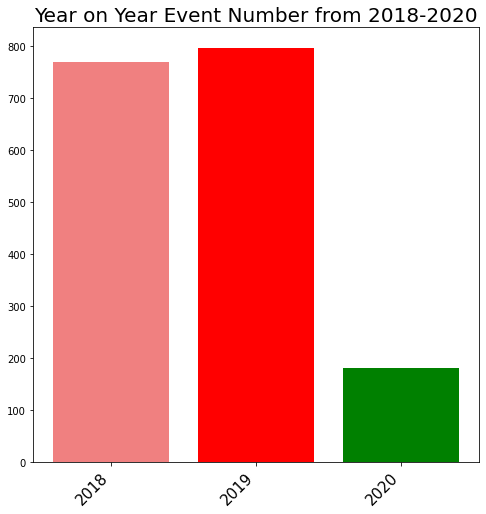

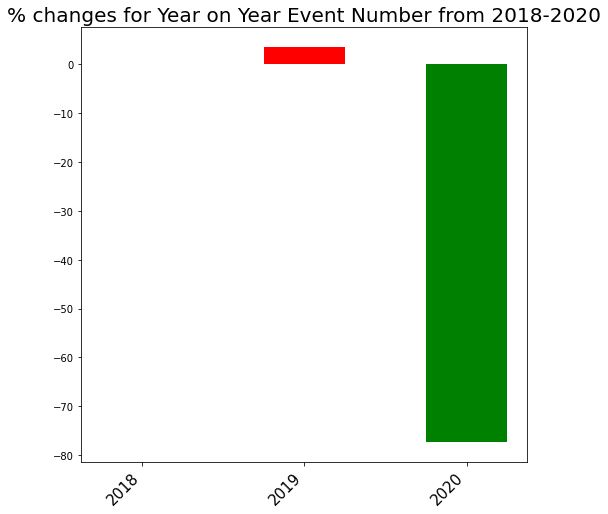

In [7]:
# we will group the activities by the year they occur
art_df_year = art_df.groupby(['year'], as_index=False).count()
print(art_df_year)

# print the number of activities in 2018, 2019 and 2020 in bar chart
bar_colors = ['lightcoral', 'red', 'green']
plt.figure(figsize=(8,8))
plt.bar(art_df_year.year, art_df_year['event_type'],color=bar_colors, width = 0.8)
plt.xticks(ticks = [2018, 2019,2020], rotation=45, ha="right", fontsize =15)
plt.title("Year on Year Event Number from 2018-2020", fontsize =20)

# # year on year increaase from 2018  to 2019
art_df_2018 = art_df.loc[art_df.year == 2018, 'year'].count()
art_df_2019 = art_df.loc[art_df.year == 2019, 'year'].count()
art_df_2020 = art_df.loc[art_df.year == 2020, 'year'].count()

## calculating the increment percentage
inc_18    = 0 
inc_19_18 = ( art_df_2019 - art_df_2018 ) /  art_df_2018 * 100.0
print(f"The growth between 2019 and 2018 is {inc_19_18} \n")
inc_20_19 = ( art_df_2020 - art_df_2019 ) / art_df_2019  * 100.0
print(f"The growth between 2020 and 2019 is {inc_20_19} \n")


## create the bar plot for the % increment
bar_colors = ['lightcoral', 'red', 'green']
plt.figure(figsize=(8,8))
plt.bar(art_df_year.year.values, [inc_18, inc_19_18, inc_20_19 ],color=bar_colors, width = 0.5)
plt.xticks(ticks = [2018, 2019,2020], rotation=45, ha="right", fontsize =15)
plt.title("% changes for Year on Year Event Number from 2018-2020", fontsize =20)


### We want to investigate the first question. What is the preferred or dominant art entertainment activitiy in Singapore

In [8]:
# the top 3 activities
x = (art_df['event_type'].loc[art_df.year==2018].value_counts()).sort_values(ascending=False).index
print('The top 3 major activities in the year 2018 is ' )
print(*(x.to_list()[0:3]), sep=', ')


x = (art_df['event_type'].loc[art_df.year==2019].value_counts()).sort_values(ascending=False).index
print('The top 3 major activities in the year 2019 is ' )
print(*(x.to_list()[0:3]), sep=', ')

x = (art_df['event_type'].loc[art_df.year==2020].value_counts()).sort_values(ascending=False).index
print('The top 3 major activities in the year 2020 is ' )
print(*(x.to_list()[0:3]), sep=', ')

The top 3 major activities in the year 2018 is 
Pop/Rock Concert, Play, Dance
The top 3 major activities in the year 2019 is 
Pop/Rock Concert, Play, Dance
The top 3 major activities in the year 2020 is 
Play, Pop/Rock Concert, Exhibition


## From above we can see top 3 major activities for the each year

 Year 2018  --- Pop Rock, Play and Dance
 Year 2019  --- Pop Rock, Play and Dance
 Year 2020  --- Play, Pop Rock And Exhibition

## We can tell more from looking at the pie chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Art/Entertainment Event in 2020')

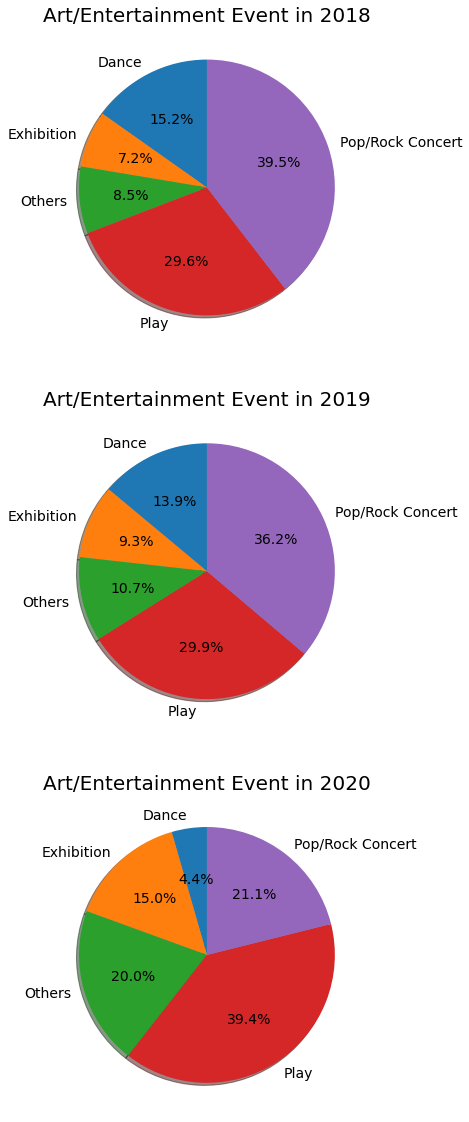

In [9]:
art_df_copy = art_df.copy()
art_df_copy.event_type[art_df_copy.event_type.isin(['MULTI-DISCIPLINARY ART','OTHERS', 'PLAY READING/POETRY READING/RECITAL','Music', 'PUPPET SHOW'])] = "Others"
art_df_yr_event = art_df_copy.groupby(['year','event_type'], as_index=False).count()

art_df_2018_event = art_df_yr_event[art_df_yr_event['year']==2018] 
art_df_2019_event = art_df_yr_event[art_df_yr_event['year']==2019]
art_df_2020_event = art_df_yr_event[art_df_yr_event['year']==2020] 

# pie plot
plt.figure(figsize=(40,20))
fig= plt.subplot(3, 1, 1)
plt.pie(art_df_2018_event['title'], labels=art_df_2018_event['event_type'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('Art/Entertainment Event in 2018', fontsize=20)

fig= plt.subplot(3, 1, 2)
plt.pie(art_df_2019_event['title'], labels=art_df_2019_event['event_type'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('Art/Entertainment Event in 2019', fontsize=20)

fig= plt.subplot(3, 1,3)
plt.pie(art_df_2020_event['title'],  labels=art_df_2020_event['event_type'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('Art/Entertainment Event in 2020', fontsize=20)



In [10]:
art_df_2020 = art_df.loc[art_df.year == 2020]
art_df_2019 = art_df.loc[art_df.year == 2019]
art_df_2018 = art_df.loc[art_df.year == 2018]
# print(type(art_df_2020['performance_start_date'].iloc[0]))

Text(0.5, 1.0, 'Art/Entertainment Event in 2018')

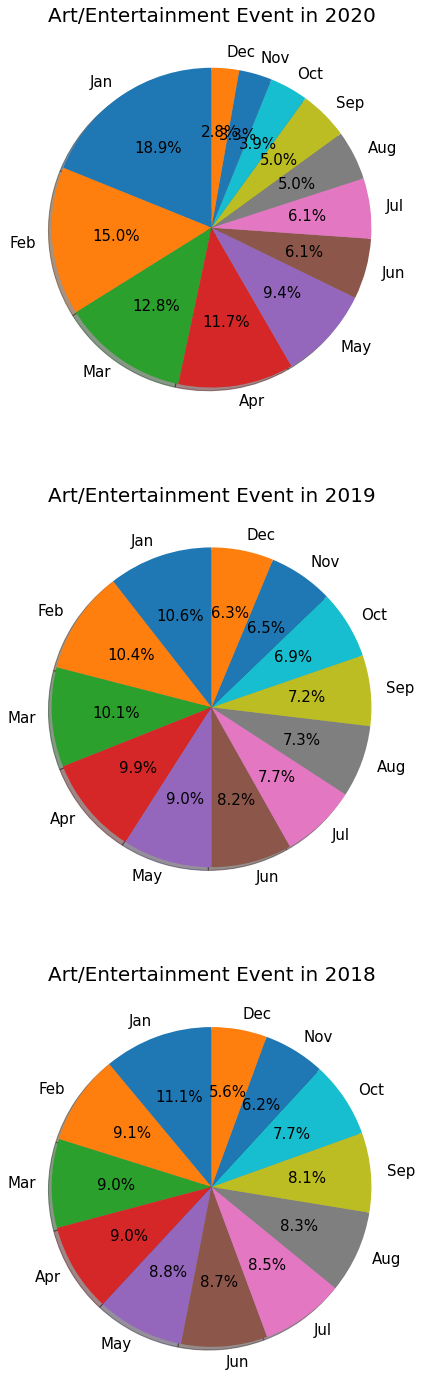

In [11]:
art_df_2020_mth = pd.to_datetime(art_df_2020['performance_start_date'], infer_datetime_format=True) 
art_df_2020_mth['month'] = art_df_2020_mth.dt.month
art_df_2020_mth_dist = art_df_2020_mth['month'].value_counts()


art_df_2019_mth = pd.to_datetime(art_df_2019['performance_start_date'], infer_datetime_format=True) 
art_df_2019_mth['month'] = art_df_2019_mth.dt.month
art_df_2019_mth_dist = art_df_2019_mth['month'].value_counts()

art_df_2018_mth = pd.to_datetime(art_df_2018['performance_start_date'], infer_datetime_format=True) 
art_df_2018_mth['month'] = art_df_2018_mth.dt.month
art_df_2018_mth_dist = art_df_2018_mth['month'].value_counts()

mth_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(40,25))
fig= plt.subplot(3, 1, 1)
plt.pie(art_df_2020_mth_dist, labels=mth_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
plt.title('Art/Entertainment Event in 2020', fontsize=20)

fig= plt.subplot(3, 1, 2)
plt.pie(art_df_2019_mth_dist, labels=mth_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
plt.title('Art/Entertainment Event in 2019', fontsize=20)

fig= plt.subplot(3, 1, 3)
plt.pie(art_df_2018_mth_dist, labels=mth_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
plt.title('Art/Entertainment Event in 2018', fontsize=20)

# Censorship

#### We will now explore the censorship count 

Text(0, 0.5, 'Percentage of activities')

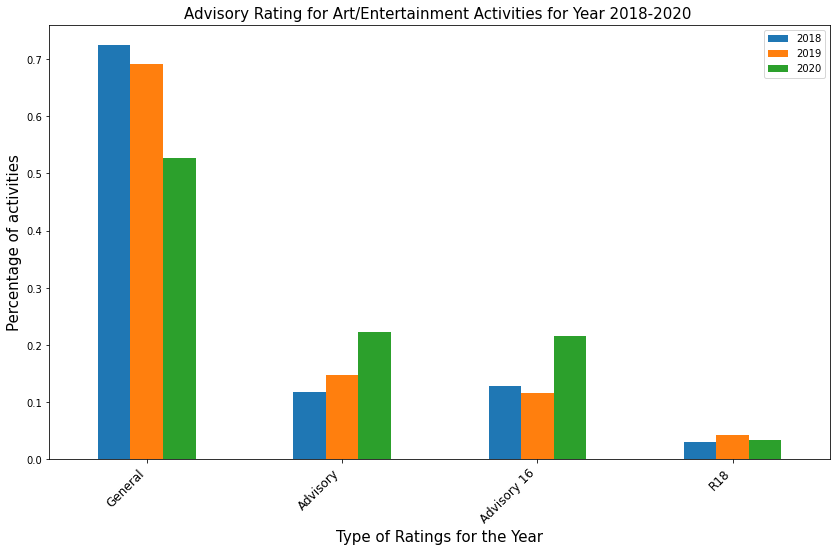

In [12]:
## Censorship
art_df_2020_rating = art_df_2020['rating_decision'].value_counts()
art_df_2019_rating = art_df_2019['rating_decision'].value_counts()
art_df_2018_rating = art_df_2018['rating_decision'].value_counts()

art_df_2020_rating = art_df_2020_rating / art_df_2020_rating.sum()
art_df_2019_rating = art_df_2019_rating / art_df_2019_rating.sum()
art_df_2018_rating = art_df_2018_rating / art_df_2018_rating.sum()

bar_colors = ['blue', 'red', 'green']

plotdata = pd.DataFrame({
    "2018":art_df_2018_rating,
    "2019":art_df_2019_rating,
    "2020":art_df_2020_rating
    }, 
    index= art_df_2020_rating.index
)

plotdata.plot(kind="bar", figsize=(14,8))
plt.title("Advisory Rating for Art/Entertainment Activities for Year 2018-2020 ", fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize =12)
plt.xlabel("Type of Ratings for the Year", fontsize=15)
plt.ylabel("Percentage of activities",fontsize=15)

# Langauge Used

#### We look at classification together with the langauge used

In [13]:
def get_langauge_type(language):
        if language in ['ENGLISH', 'CHINESE', 'MALAY', 'TAMIL']:
           return language
        else:
           return 'OTHERS'

def get_rating(rating):
        if rating == "General":
           return rating
        else:
           return 'Mature'

def get_value(l):
        ol = art_df_rating_language['language'][art_df_rating_language.language == l].count()
        ncl = art_df_rating_language['language'][(art_df_rating_language.language == l) & (art_df_rating_language.rating == "General")].count()
        cl = art_df_rating_language['language'][ (art_df_rating_language.language == l) & (art_df_rating_language.rating == "Mature")].count()
        return [ol, ncl, cl]


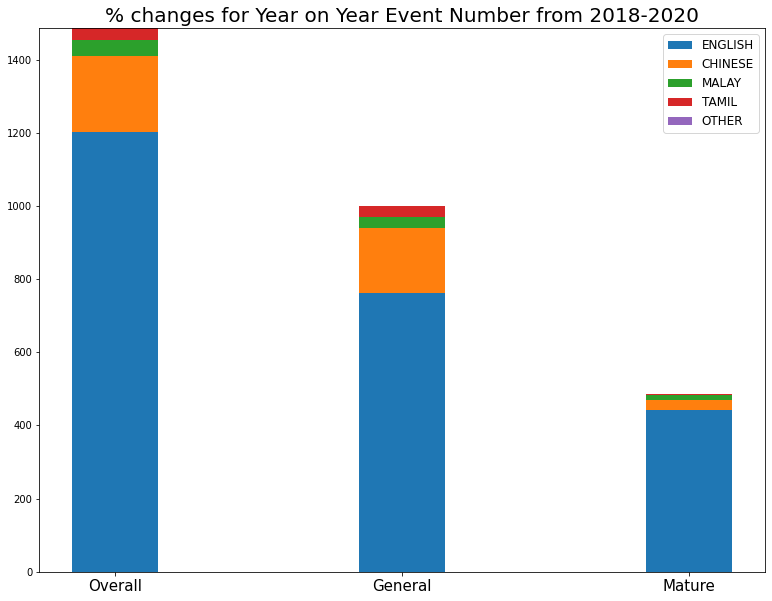

In [14]:
official_language = ['ENGLISH', 'CHINESE', 'MALAY', 'TAMIL']
unofficial_language = official_language.append('OTHER')
category =['Overall', 'General', 'Mature']

art_df_language = art_df.language.apply(get_langauge_type)
art_df_rating = art_df.rating_decision.apply(get_rating)

art_df_rating_language = pd.DataFrame({'language':art_df_language, 'rating':art_df_rating})


plt.figure(figsize=(13,10))

margin_bottom =[0,0,0]
for language in official_language:
    values = get_value(language)

    plt.bar(category, values, bottom = margin_bottom, width = 0.3)

    out_arr = np.add(np.array(margin_bottom), np.array(values)) 
    margin_bottom = out_arr.tolist()

plt.xticks(ticks = category, ha="center", fontsize =15)
plt.title(" ", fontsize =20)
plt.legend(official_language, fontsize=12)
plt.show()




#### Just for Fun
To find the company with the most production

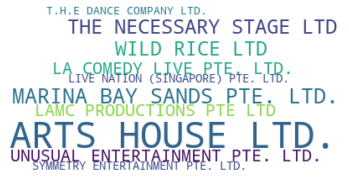

In [15]:
# Just for Fun
words = art_df['company_name']
word_cloud_lst = Counter(words)
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#### The company with the most "mature" production


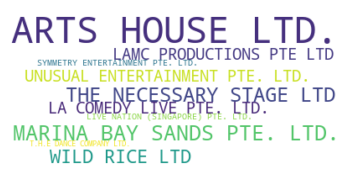

In [16]:
art_df_mature = art_df[art_df.rating_decision != 'Mature']

words = art_df_mature['company_name']
word_cloud_lst = Counter(words)
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()